# 선형 회귀분석 (Linear Regression)
![img1](https://upload.wikimedia.org/wikipedia/commons/b/be/Normdist_regression.png)

- 변수 사이의 관계를 선형으로 나타내는 것
- 변수 간 독립성을 만족할수록 더 높은 분석력을 가짐

## 전체 코드

(506, 13) (506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]] [24.  21.6]
정확도 : 0.740643


[]

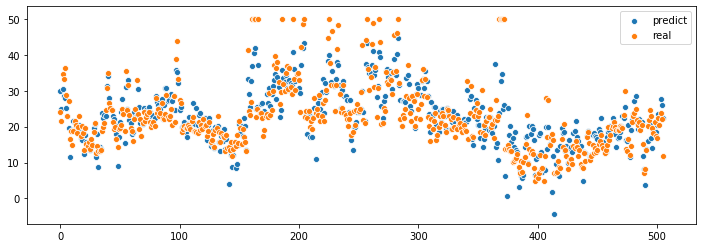

In [133]:
from sklearn.linear_model import LinearRegression # 선형회귀
from sklearn.linear_model import Lasso, Ridge, ElasticNet # 규제항 조절가능한 선형회귀
import numpy as np # 데이터 셋을 다루기 위한 패키지
from sklearn.datasets import load_boston # 보스턴 집값 데이터

# 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt

boston_data = load_boston()
boston_data.keys()

# 506행 13개의 feature (독립변수), 506개의 집값 데이터 (종속변수)
print(boston_data.data.shape, boston_data.target.shape)
print(boston_data.feature_names)

# 데이터 타입 = numpy 배열
print(type(boston_data.data), type(boston_data.target))
print(boston_data.data[:2], boston_data.target[:2])

# 학습
lr = LinearRegression()
lr.fit(boston_data.data, boston_data.target)

# 예측
pred = lr.predict(boston_data.data)

# R^2 Score
print('정확도 : %f'%lr.score(boston_data.data, boston_data.target))

plt.figure(figsize=(12,4))
sns.scatterplot(range(len(pred)), pred, label='predict')
sns.scatterplot(range(len(pred)), boston_data.target, label='real')
plt.plot()

## 패키지 Import

In [2]:
from sklearn.linear_model import LinearRegression # 선형회귀
from sklearn.linear_model import Lasso, Ridge, ElasticNet # 규제항 조절가능한 선형회귀
import numpy as np # 데이터 셋을 다루기 위한 패키지
from sklearn.datasets import load_boston # 보스턴 집값 데이터

# 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt

## 예시 데이터 로드, 확인

In [80]:
boston_data = load_boston()
boston_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [16]:
# 506행 13개의 feature (독립변수), 506개의 집값 데이터 (종속변수)
print(boston_data.data.shape, boston_data.target.shape)
print(boston_data.feature_names)

(506, 13) (506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [20]:
# 데이터 타입 = numpy 배열
print(type(boston_data.data), type(boston_data.target))
print(boston_data.data[:2], boston_data.target[:2])

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]] [24.  21.6]


## 모델링, 학습

In [24]:
# 학습
lr = LinearRegression()
lr.fit(boston_data.data, boston_data.target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
# 예측
pred = lr.predict(boston_data.data)

In [74]:
# R^2 Score
print('정확도 : %f'%lr.score(boston_data.data, boston_data.target))

정확도 : 0.740643


[]

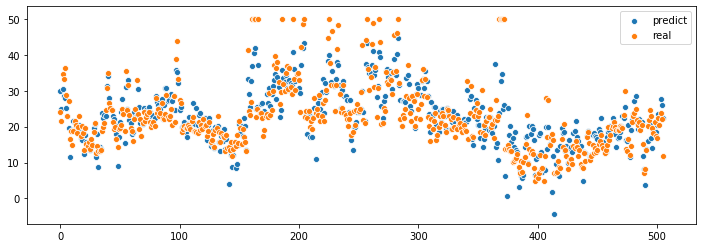

In [36]:
plt.figure(figsize=(12,4))
sns.scatterplot(range(len(pred)), pred, label='predict')
sns.scatterplot(range(len(pred)), boston_data.target, label='real')
plt.plot()

정확도 : 0.714016


[]

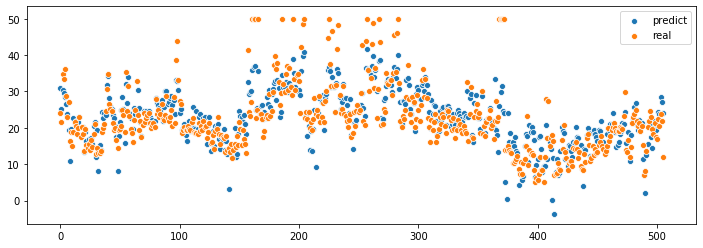

In [77]:
# 규제항 적용 (중요도 낮은 변수들 일정한 간격만큼 감소)
lasso = Lasso(alpha=0.5)
lasso.fit(boston_data.data, boston_data.target)
pred = lasso.predict(boston_data.data)
print('정확도 : %f'%lasso.score(boston_data.data, boston_data.target))

plt.figure(figsize=(12,4))
sns.scatterplot(range(len(pred)), pred, label='predict')
sns.scatterplot(range(len(pred)), boston_data.target, label='real')
plt.plot()

정확도 : 0.739957


[]

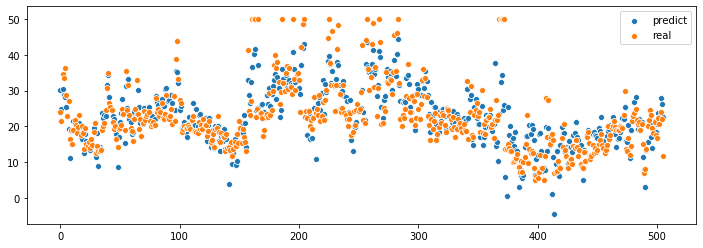

In [78]:
# 규제항 적용 (중요도 낮은 변수들 0에 가까워질수록 적게 감소)
ridge = Ridge(alpha=0.5)
ridge.fit(boston_data.data, boston_data.target)
pred = ridge.predict(boston_data.data)
print('정확도 : %f'%ridge.score(boston_data.data, boston_data.target))

plt.figure(figsize=(12,4))
sns.scatterplot(range(len(pred)), pred, label='predict')
sns.scatterplot(range(len(pred)), boston_data.target, label='real')
plt.plot()

정확도 : 0.693446


[]

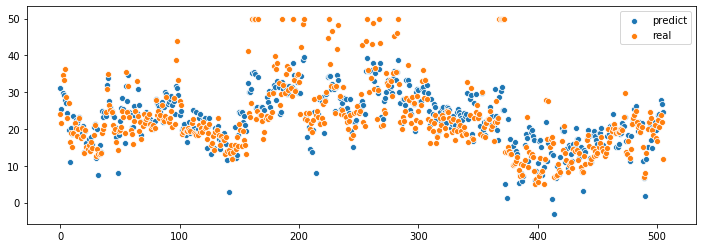

In [79]:
# Lasso와 Ridge의 특성을 모두 가짐
elasticnet = ElasticNet(alpha=0.8)
elasticnet.fit(boston_data.data, boston_data.target)
pred = elasticnet.predict(boston_data.data)
print('정확도 : %f'%elasticnet.score(boston_data.data, boston_data.target))

plt.figure(figsize=(12,4))
sns.scatterplot(range(len(pred)), pred, label='predict')
sns.scatterplot(range(len(pred)), boston_data.target, label='real')
plt.plot()

## 데이터 정규화 (Nomalization)

In [99]:
from sklearn.preprocessing import normalize

In [100]:
norm_data = normalize(boston_data.data)

In [101]:
lr.fit(norm_data, boston_data.target)
lr.score(norm_data, boston_data.target)

0.7441198287299156

In [102]:
pred = lr.predict(norm_data)

[]

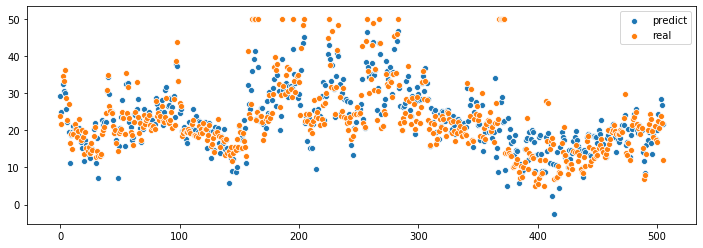

In [103]:
plt.figure(figsize=(12,4))
sns.scatterplot(range(len(pred)), pred, label='predict')
sns.scatterplot(range(len(pred)), boston_data.target, label='real')
plt.plot()

# 로지스틱 회귀분석 (Logistic Regression)
![img2](https://media.vlpt.us/images/vvakki_/post/6280b5f9-b29c-405a-8892-a4a1e6ce4359/image.png)

- 벡터공간 상 데이터를 임의의 선(면)으로 나누어 그 선을 경계로 어느 한 집단에 분류되는 것
- 집단을 나누는 선과의 거리가 멀수록 해당 집단에 속할 확률이 높아진다

## 전체 코드

(150, 4) (150,)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]] [0 0]
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  predict  
0       0        0  
1       0        0  
2       0        0  
3       0        0  
4       0        0  


[]

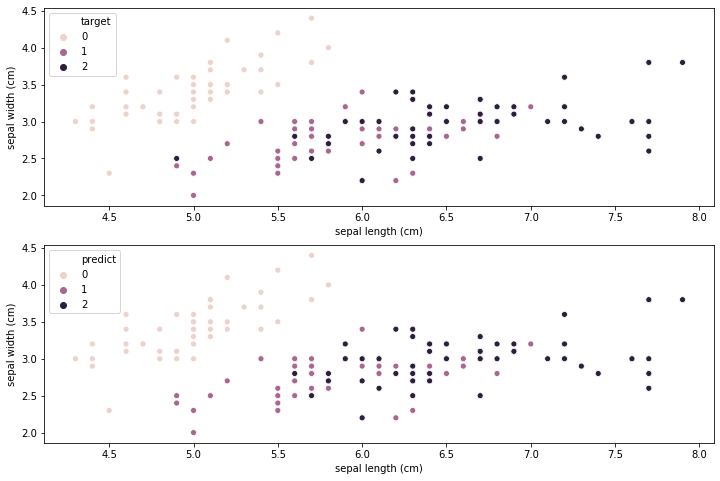

In [134]:
from sklearn.linear_model import LogisticRegression
import numpy as np # 데이터 셋을 다루기 위한 패키지
from sklearn.datasets import load_iris # 붓꽃 데이터

import pandas as pd # 시각화를 위한 데이터 패키지

# 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt

iris_data = load_iris()
iris_data.keys()

# 150개의 데이터, 4개의 feature (독립변수), 150개의 붓꽃 종(species) 데이터 (종속변수)
print(iris_data.data.shape, iris_data.target.shape)
print(iris_data.feature_names)

# 데이터 타입 = numpy 배열
print(type(iris_data.data), type(iris_data.target))
print(iris_data.data[:2], iris_data.target[:2])

Logitr = LogisticRegression()
Logitr.fit(iris_data.data, iris_data.target)
pred = Logitr.predict(iris_data.data)

df_iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

df_iris['target'] = iris_data.target
df_iris['predict'] = pred

print(df_iris.head())

plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
sns.scatterplot(data = df_iris, x = 'sepal length (cm)', y = 'sepal width (cm)', hue='target')
plt.subplot(2,1,2)
sns.scatterplot(data = df_iris, x = 'sepal length (cm)', y = 'sepal width (cm)', hue='predict')
plt.plot()

## 패키지 Import

In [113]:
from sklearn.linear_model import LogisticRegression
import numpy as np # 데이터 셋을 다루기 위한 패키지
from sklearn.datasets import load_iris # 붓꽃 데이터

import pandas as pd # 시각화를 위한 데이터 패키지

# 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt

## 예시 데이터 로드, 확인

In [84]:
iris_data = load_iris()
iris_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [86]:
# 150개의 데이터, 4개의 feature (독립변수), 150개의 붓꽃 종(species) 데이터 (종속변수)
print(iris_data.data.shape, iris_data.target.shape)
print(iris_data.feature_names)

(150, 4) (150,)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [87]:
# 데이터 타입 = numpy 배열
print(type(iris_data.data), type(iris_data.target))
print(iris_data.data[:2], iris_data.target[:2])

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]] [0 0]


## 모델링, 학습

In [104]:
Logitr = LogisticRegression()
Logitr.fit(iris_data.data, iris_data.target)
pred = Logitr.predict(iris_data.data)

In [120]:
df_iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

In [121]:
df_iris['target'] = iris_data.target
df_iris['predict'] = pred

In [122]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,predict
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


## 시각화

[]

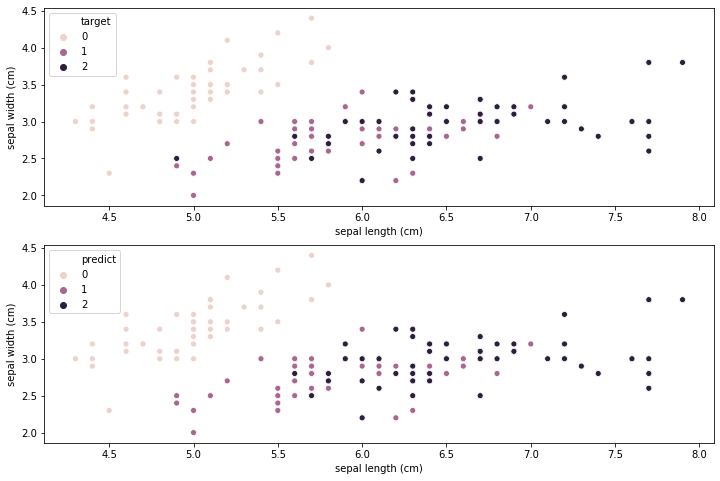

In [132]:
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
sns.scatterplot(data = df_iris, x = 'sepal length (cm)', y = 'sepal width (cm)', hue='target')
plt.subplot(2,1,2)
sns.scatterplot(data = df_iris, x = 'sepal length (cm)', y = 'sepal width (cm)', hue='predict')
plt.plot()